<a href="https://colab.research.google.com/github/Navjotkhatri/Data-Scientist-Salary-Analysis/blob/main/Data_Scientist_worldwide_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project-Data Scientist worldwide Salary Analysis**
**Contributor-Navjot Khatri**

Data Science and Machine Learning are increasingly gaining popularity in various fields such as Sports, Art, Space, medicine, healthcare and many more. It would be insightful to have a look at the salaries and current employment status of these data scientist across various places around the world.

The dataset was downloaded from kaggle (link given below) and we will be making an exploratory analysis of the data, visualise it. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

**Content**

**Column-Description**

work_year	The year the salary was paid.

experience_level	-The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type	-The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title	-The role worked in during the year.

salary	-The total gross salary amount paid.

salary_currency	-The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd	-The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence	-Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio	-The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location	-The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size	-The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

**Exploratory Analysis and Visualization**

In this Project, we will be doing exploratory data analysis and visualization of given dataset. 

Following items are on the agenda:

* Distribution of Experience level
* Distribution of Work type
* Comparing salaries of Data scientist jobs based on Experience level
* Comparing salaries of Data scientist jobs based on Employment type
* Comparing salaries based on experience level and Size of company
* Comparing Data scientist salaries across the world
* Average salary as a function of currency
* Average Salary as a function of location
* Top 10 Data Science job positions
* Remote work status as function of time

## **Data Prepration**

In [168]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
#reading csv file-1
working_dir_path="/content/drive/MyDrive/Colab Notebooks/Self Projects/Data  Scientist Salary Analysis/ds_salaries.csv"
sl_df=pd.read_csv(working_dir_path)

In [171]:
sl_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [172]:
sl_df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [173]:
sl_df.shape

(607, 12)

In [174]:
sl_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [175]:
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [176]:
sl_df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [177]:
sl_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## **Data Cleaning**

In [178]:
sl_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [179]:
sl_df['employee_residence'] = sl_df['employee_residence'].astype('category')
sl_df['company_location'] = sl_df['company_location'].astype('category')
sl_df['company_size'] = sl_df['company_size'].astype('category')
sl_df['experience_level'] = sl_df['experience_level'].astype('category')
sl_df['employment_type'] = sl_df['employment_type'].astype('category')

In [180]:
sl_df['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [181]:
sl_df['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

In [182]:
sl_df['company_size'].unique()

['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']

In [183]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## **Visualization Of Data**

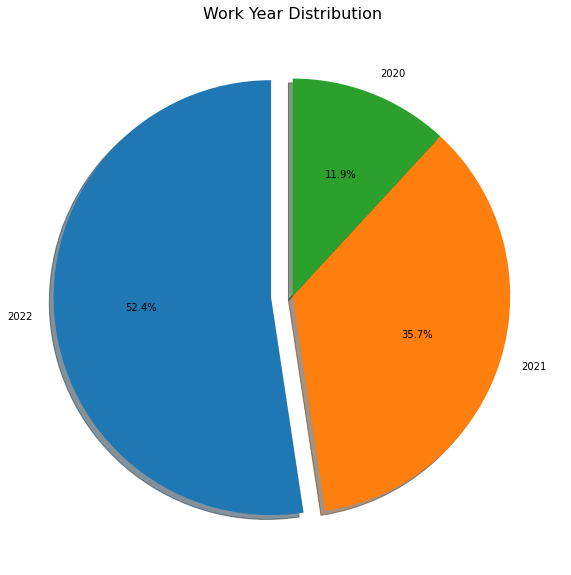

In [241]:
plt.figure(figsize=(10,10))
plt.title("Work Year Distribution",fontsize = 16)
plt.pie(sl_df.work_year.value_counts(), labels=sl_df.work_year.value_counts().index,autopct='%1.1f%%',startangle=90,shadow = True,explode=(.1,0,0))
plt.show()

* Work Year Distribution In this dataset-2022 has 52.4% Entry in this Data.

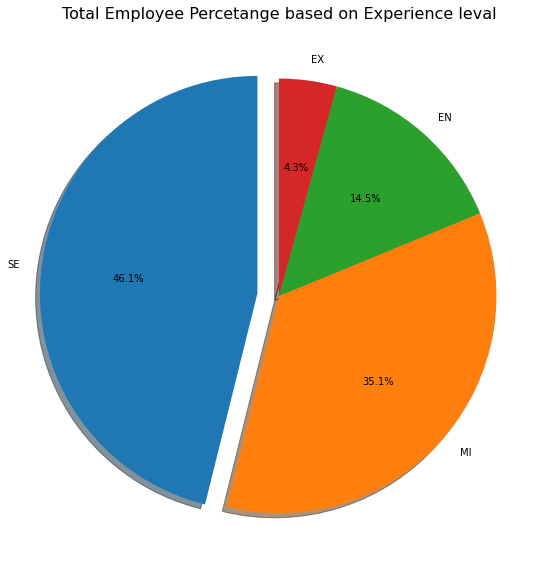

In [240]:
#pie chart 
plt.figure(figsize=(10,10))
plt.title("Total Employee Percetange based on Experience leval",fontsize = 16)
plt.pie(sl_df.experience_level.value_counts(), labels=sl_df.experience_level.value_counts().index,autopct='%1.1f%%',startangle=90,shadow = True,explode=(.1,0,0,0))
plt.show()


* In the dataset 14.5% members are freshers while most quota is filled by Senior Engineers at 46.1%.

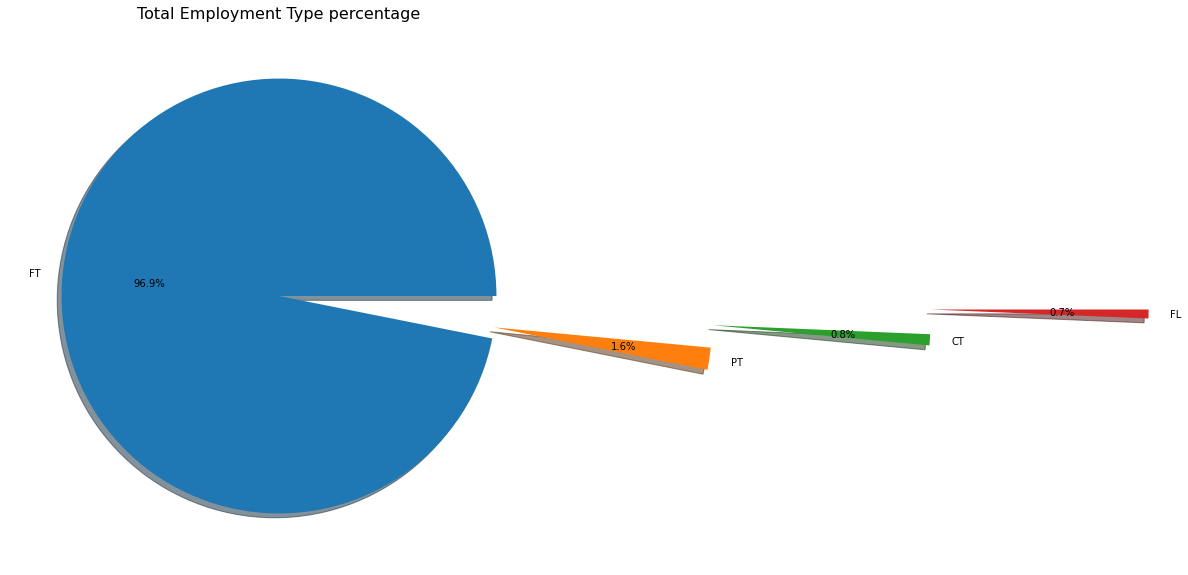

In [237]:
#pie chart 
plt.figure(figsize=(10,10))
plt.title("Total Employment Type percentage",fontsize = 16)
plt.pie(sl_df.employment_type.value_counts(), labels=sl_df.employment_type.value_counts().index,autopct='%1.1f%%',startangle=360,explode=(0,1,2,3),shadow = True)
plt.show()


* More than 96% Employee are Full time and very less are Frelancer almost 0.7%.

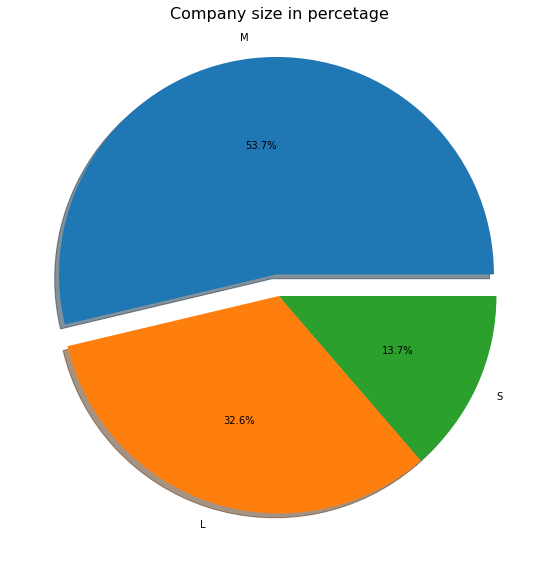

In [239]:
plt.figure(figsize=(10,10))
plt.title("Company size in percetage",fontsize = 16)
plt.pie(sl_df.company_size	.value_counts(), labels=sl_df.company_size	.value_counts().index,autopct='%1.1f%%',shadow = True,explode=(.1,0,0))
plt.show()

* 53.7% of Companies are Medium mins 50 to 250 employees are working init.

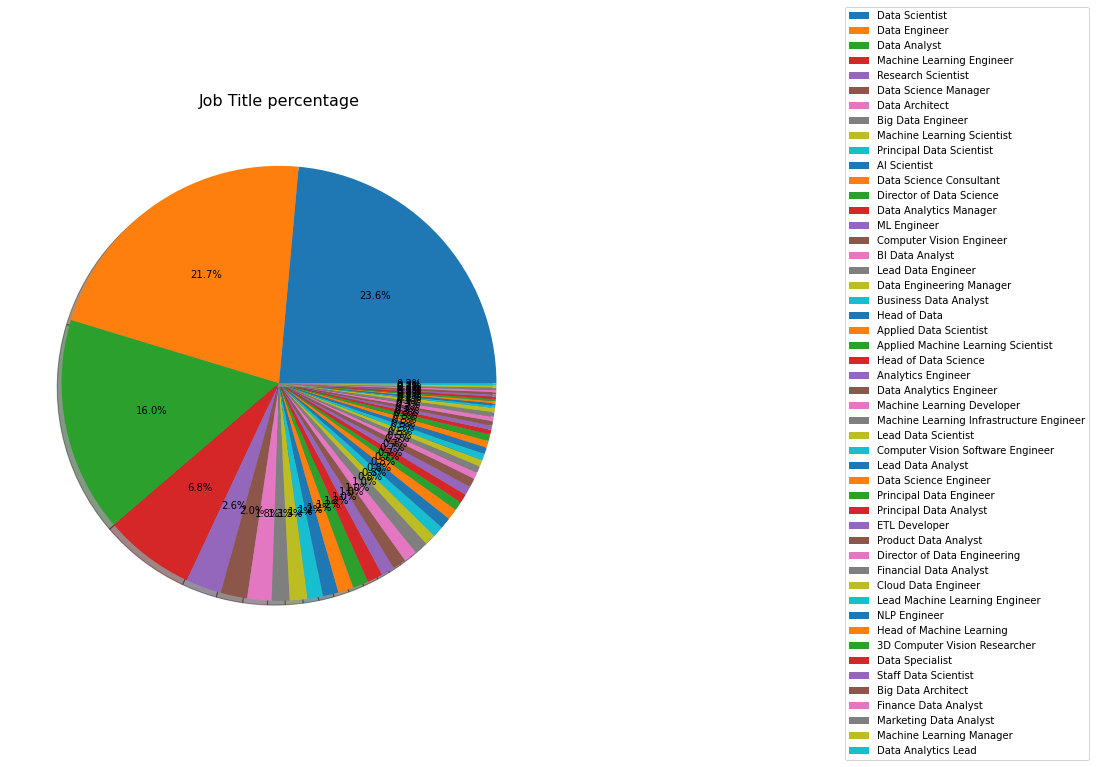

In [258]:
plt.figure(figsize=(10,10))
plt.title("Job Title percentage",fontsize = 16)
plt.pie(sl_df.job_title	.value_counts(),autopct='%1.1f%%',shadow = True)
plt.legend(labels=sl_df.job_title	.value_counts().index,loc='right',bbox_to_anchor=(2, 0.5))
plt.show()

* It can be observed that Data Scientist is the most common job title followed by Data Engineers and Data Analysts respectively.

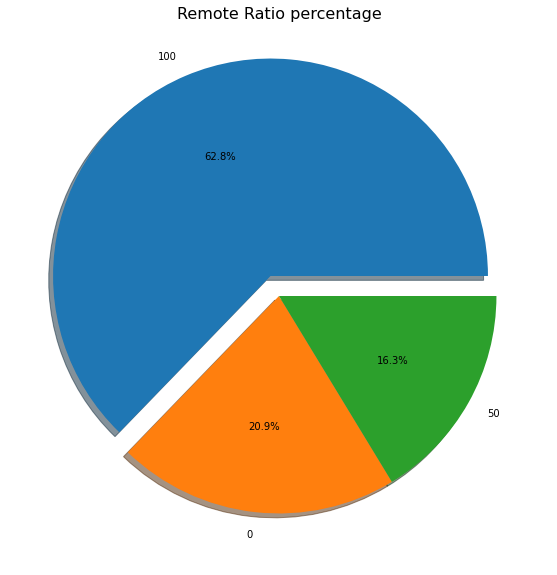

In [259]:
plt.figure(figsize=(10,10))
plt.title("Remote Ratio percentage",fontsize = 16)
plt.pie(sl_df.remote_ratio	.value_counts(), labels=sl_df.remote_ratio	.value_counts().index,autopct='%1.1f%%',shadow = True,explode=(.1,0,0))
plt.show()

100=Work From Home

50=Hybrid

0=Office Work

* During the period 2020–2022, 62.8% of members have shifted to work from home modalities owing to Covid — 19 crisis. Later, we will see trend shifting back to the normalcy.

In [190]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


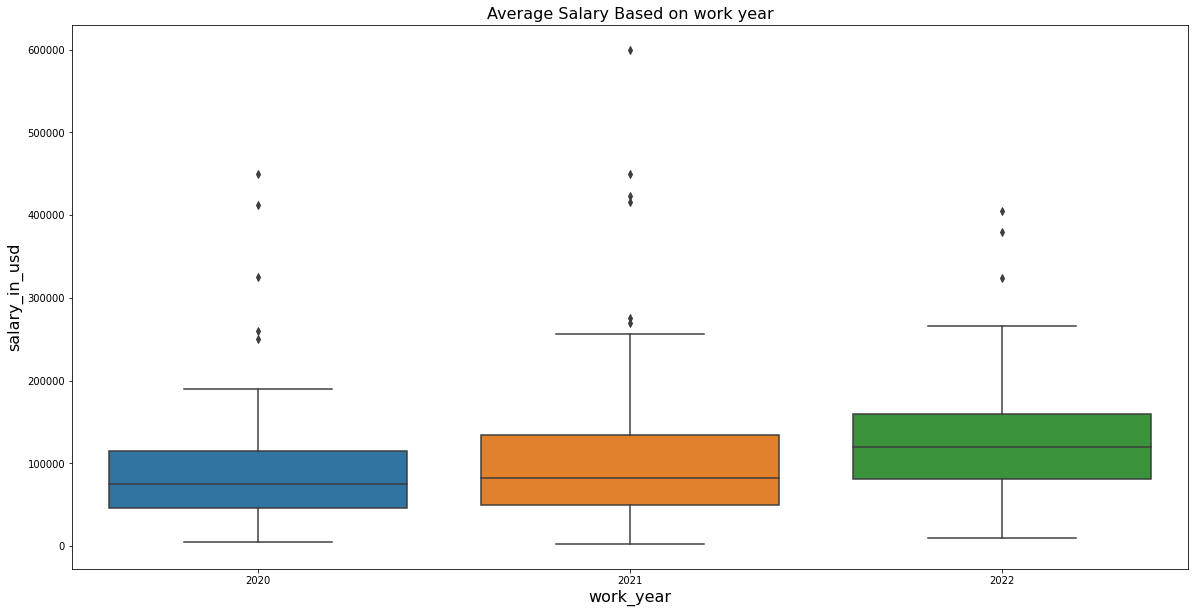

In [260]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on work year",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='work_year',data =sl_df)
plt.xlabel("work_year",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* The average salary in different years.2022 seems to be a small increment in salary.

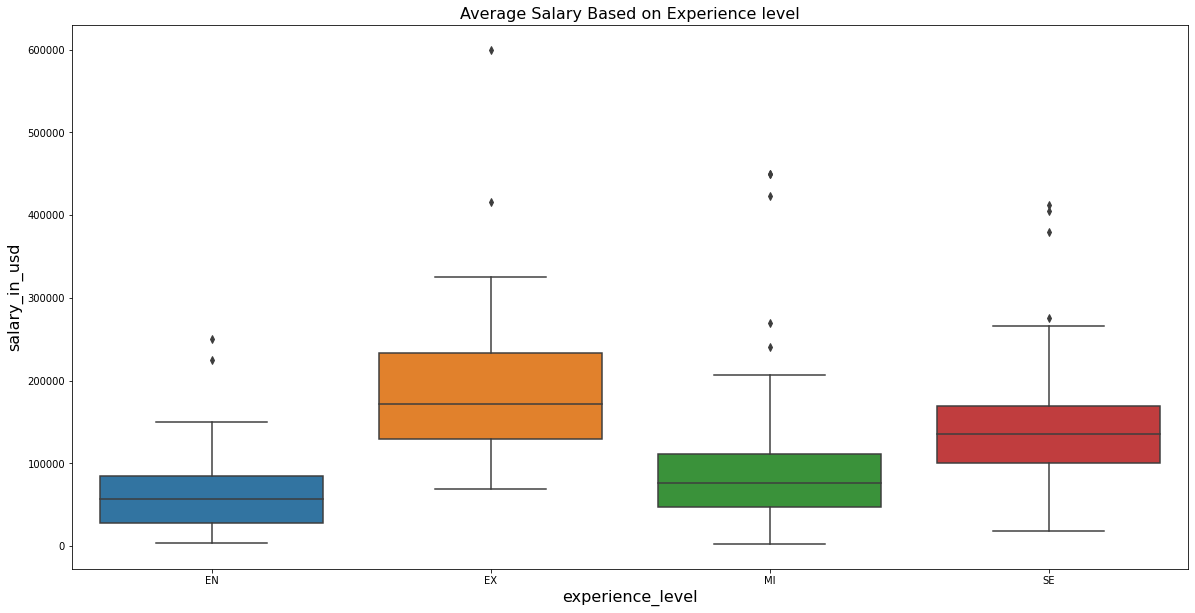

In [261]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on Experience level",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='experience_level',data =sl_df)
plt.xlabel("experience_level",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* Naturally, it can be seen that more the experience, better you get paid for it. However, at highest executive level, the salaries various much more as compared to other levels.

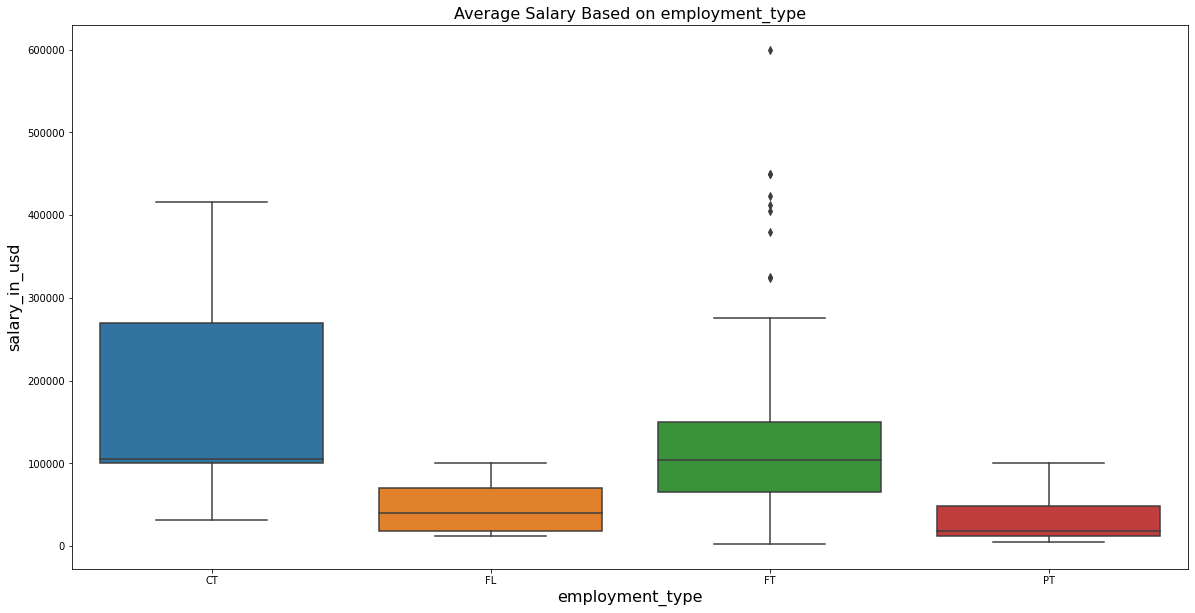

In [262]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on employment_type",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='employment_type',data =sl_df)
plt.xlabel("employment_type",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* It seems contract based jobs earn the most out of all the type. Although the variation in their pay scale is also too high. An interesting observation is that freelancers earn more than part timers but variation in their pay scales almost looks proportional.

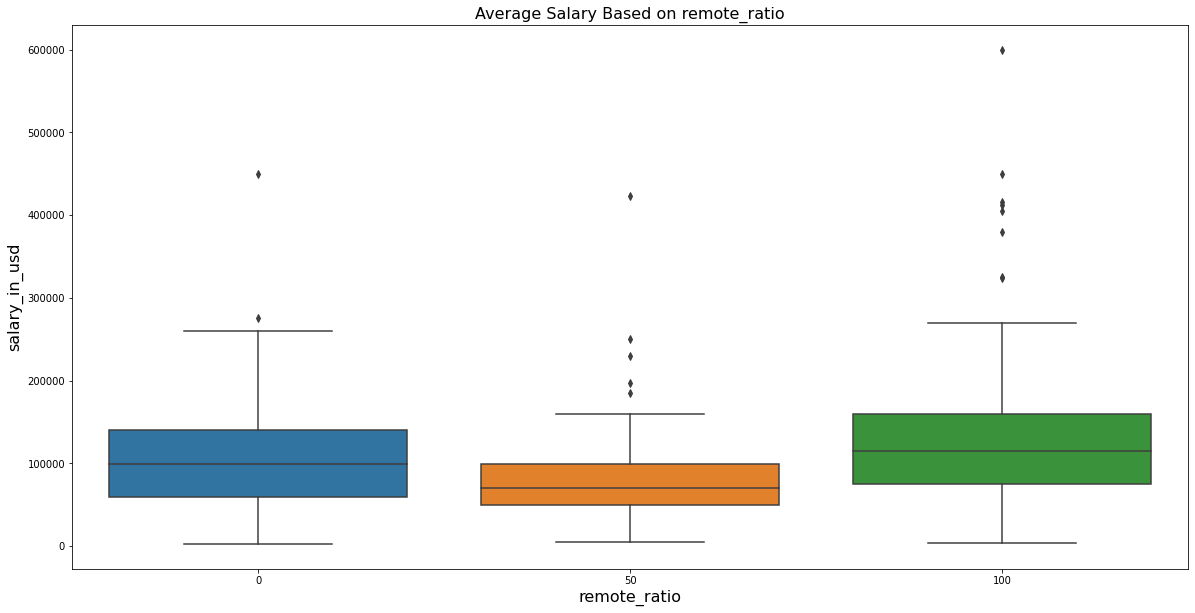

In [263]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on remote_ratio",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='remote_ratio',data =sl_df)
plt.xlabel("remote_ratio",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* Surprisingly Hybrid jobs have less Average salary from work from home and office work culture.

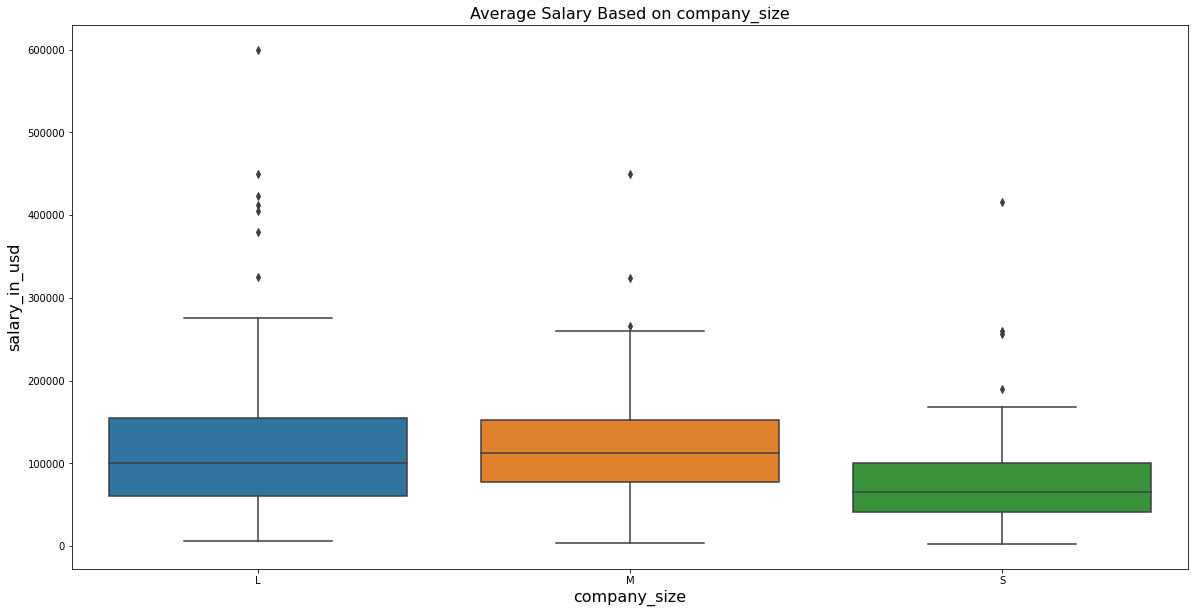

In [264]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on company_size",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='company_size',data =sl_df)
plt.xlabel("company_size",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* Average Salary Based on Company size seems to be equally distributed Accpect Small companies.

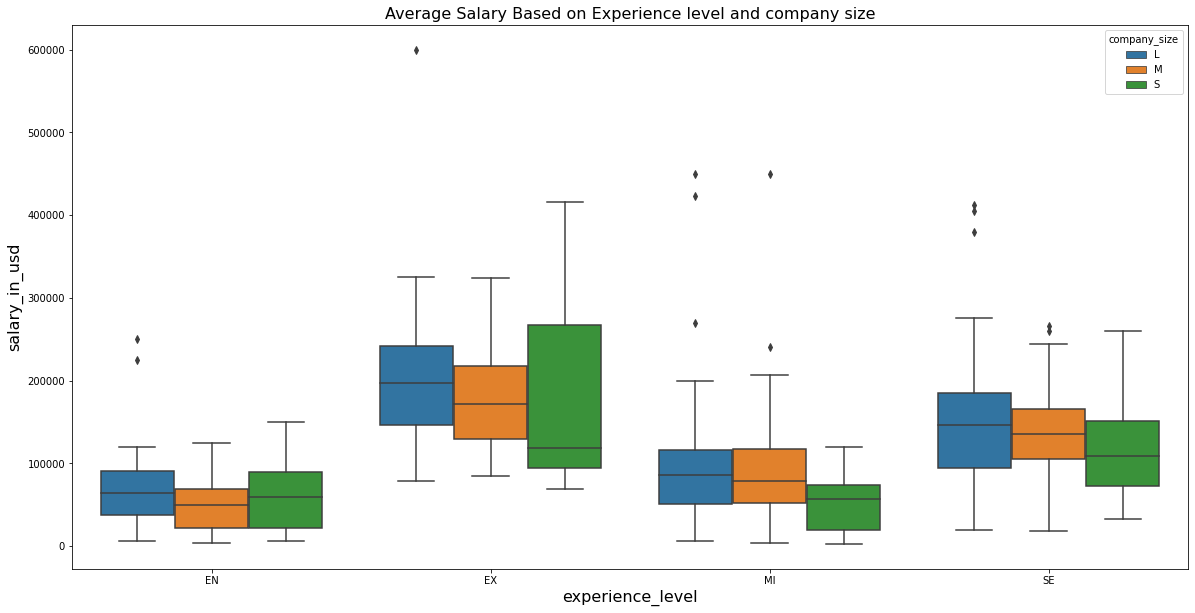

In [265]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on Experience level and company size",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='experience_level',data =sl_df,hue=sl_df.company_size)
plt.xlabel("experience_level",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* Adding a hue ‘company size’ for the previous ‘experience level’ vs ‘salary’ graph reveals more information. Senior levels jobs salaries on an average coincides with Executive level salaries. Moreover, on an average senior levels jobs salaries of small companies almost coincide with executive level salaries of respective company size.

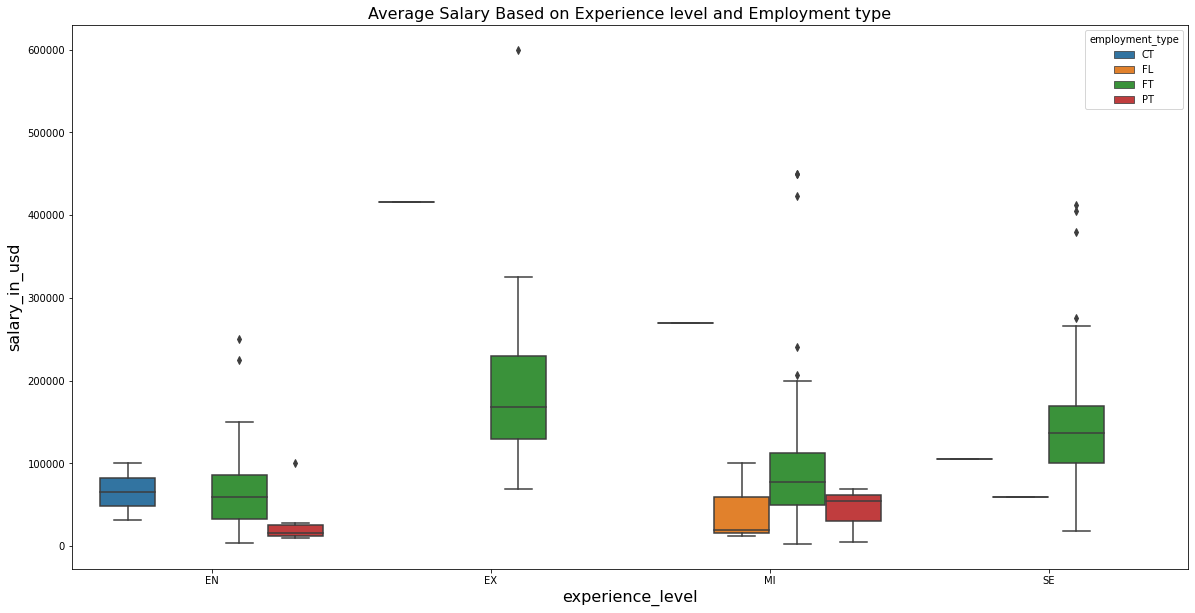

In [266]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on Experience level and Employment type",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='experience_level',data =sl_df,hue=sl_df.employment_type)
plt.xlabel("experience_level",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.show()

* Full-Time Working professionals have high Salary at Every level of Experience.

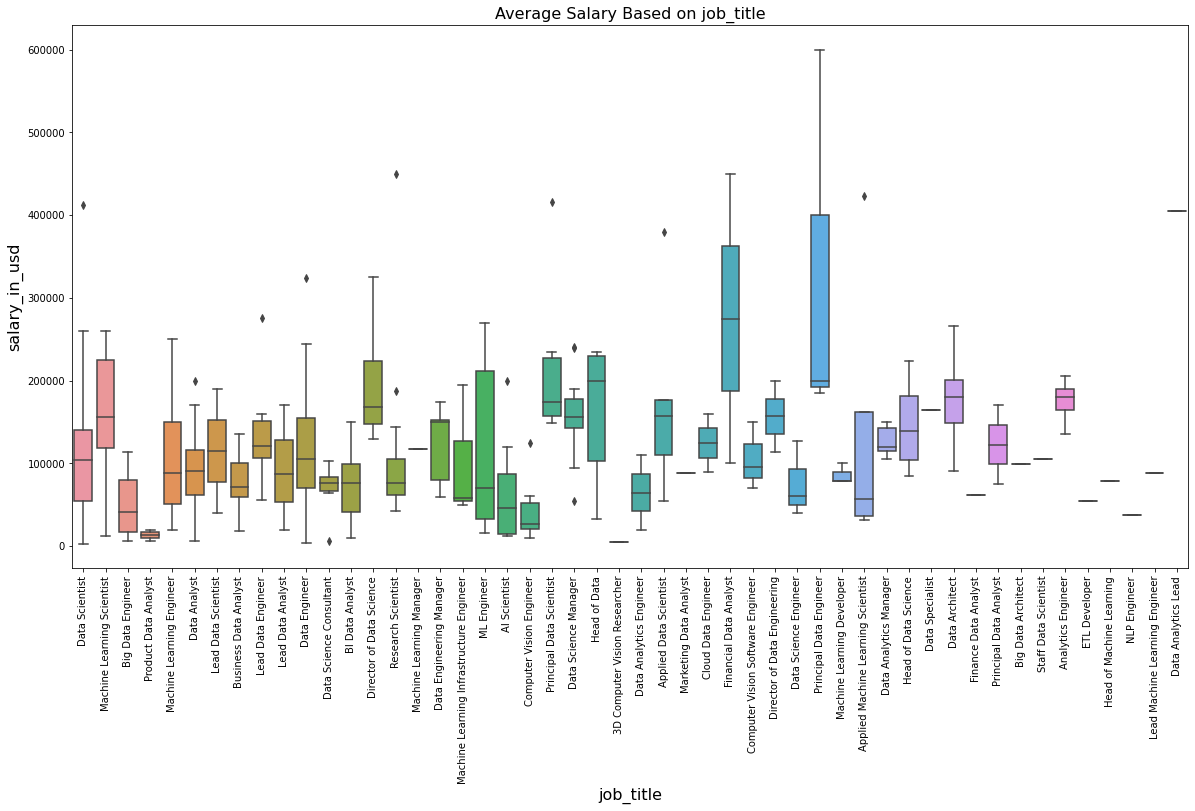

In [267]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Based on job_title",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =sl_df)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* From this Data set job with the highest salary is Principal data engineer.

In [199]:
sl_df['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [200]:
df1=sl_df.loc[sl_df['experience_level'] =='EN']
df2=sl_df.loc[sl_df['experience_level'] =='MI']
df3=sl_df.loc[sl_df['experience_level'] =='SE']
df4=sl_df.loc[sl_df['experience_level'] =='EX']

In [201]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
...,...,...,...,...,...,...,...,...,...,...,...
512,2022,EN,FT,Data Engineer,65000,USD,65000,US,100,US,S
514,2022,EN,FT,Data Analytics Engineer,20000,USD,20000,PK,0,PK,M
521,2022,EN,FT,Computer Vision Engineer,10000,USD,10000,PT,100,LU,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M


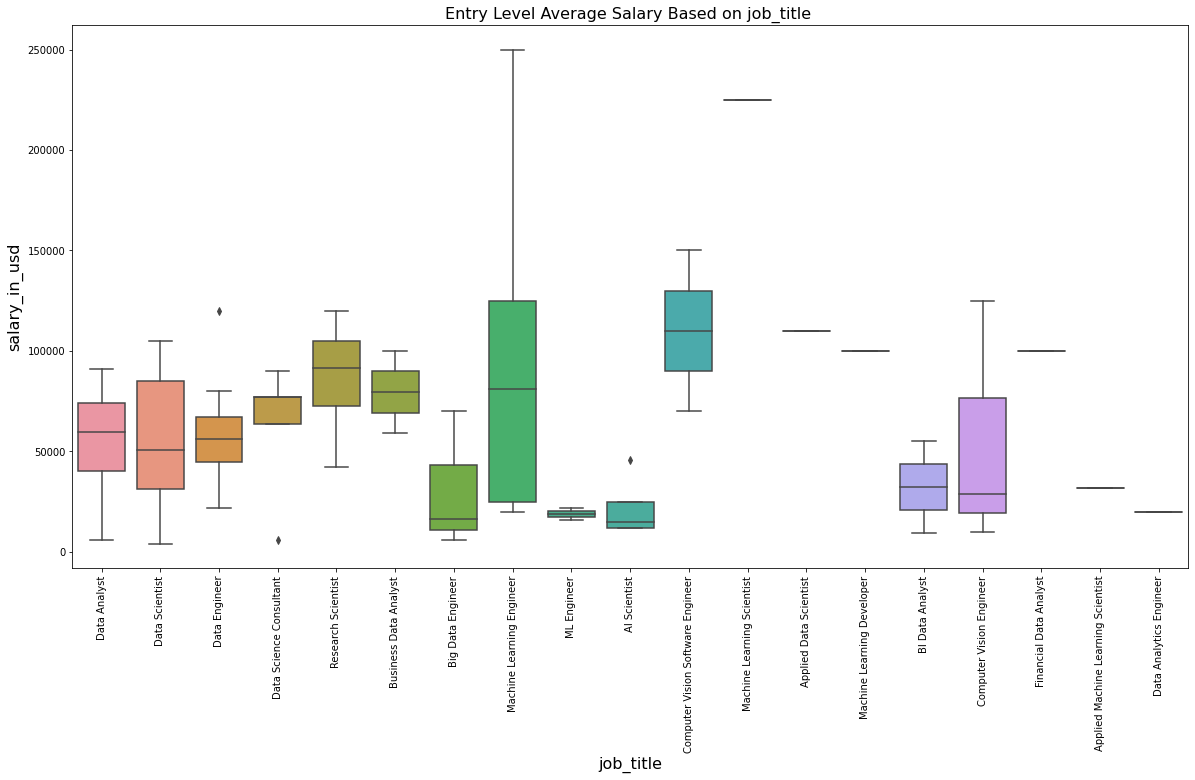

In [268]:
plt.figure(figsize=(20,10))
plt.title("Entry Level Average Salary Based on job_title ",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df1)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

Machine Learning Engineer is a high-paying job role for entry-level job seekers.

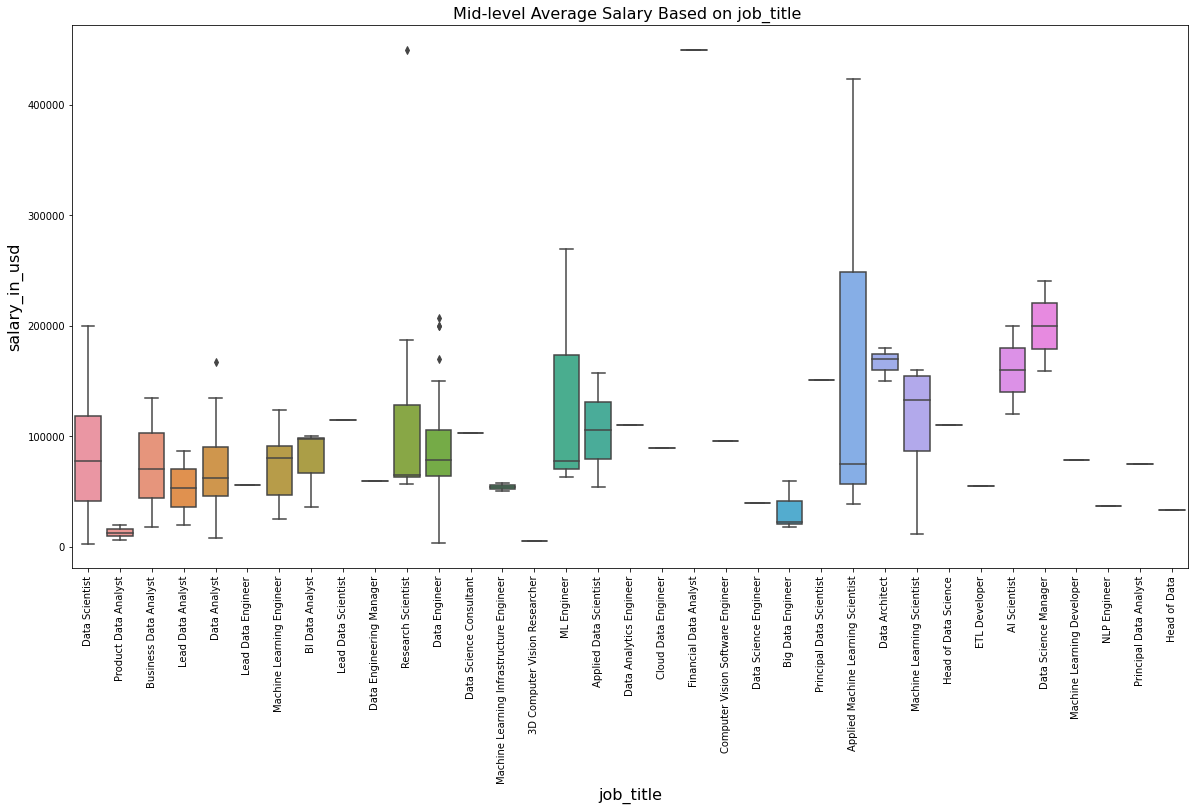

In [269]:
plt.figure(figsize=(20,10))
plt.title("Mid-level Average Salary Based on job_title ",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df2)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Applied Machine Learning Scientist is a high-paying job role for mid-level job seekers.

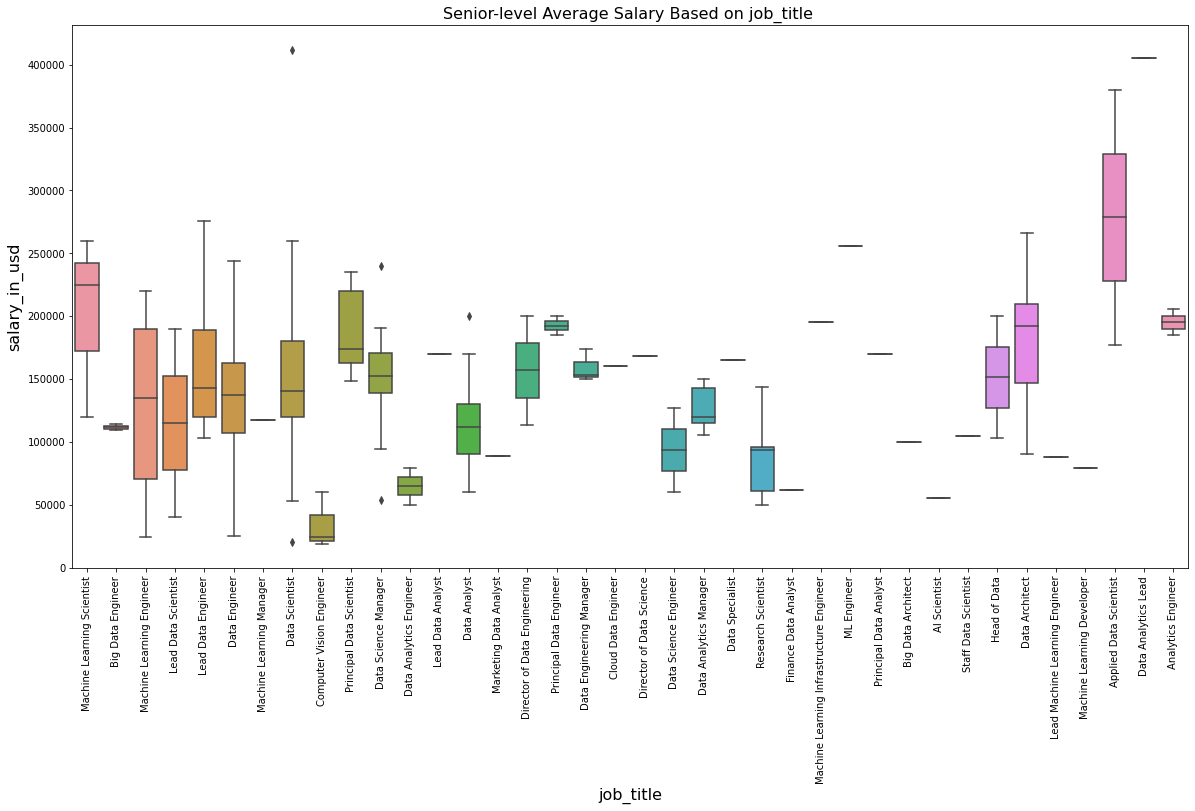

In [270]:
plt.figure(figsize=(20,10))
plt.title("Senior-level Average Salary Based on job_title ",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df3)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Applied Data Scientist is a high-paying job role for senior-level job seekers.

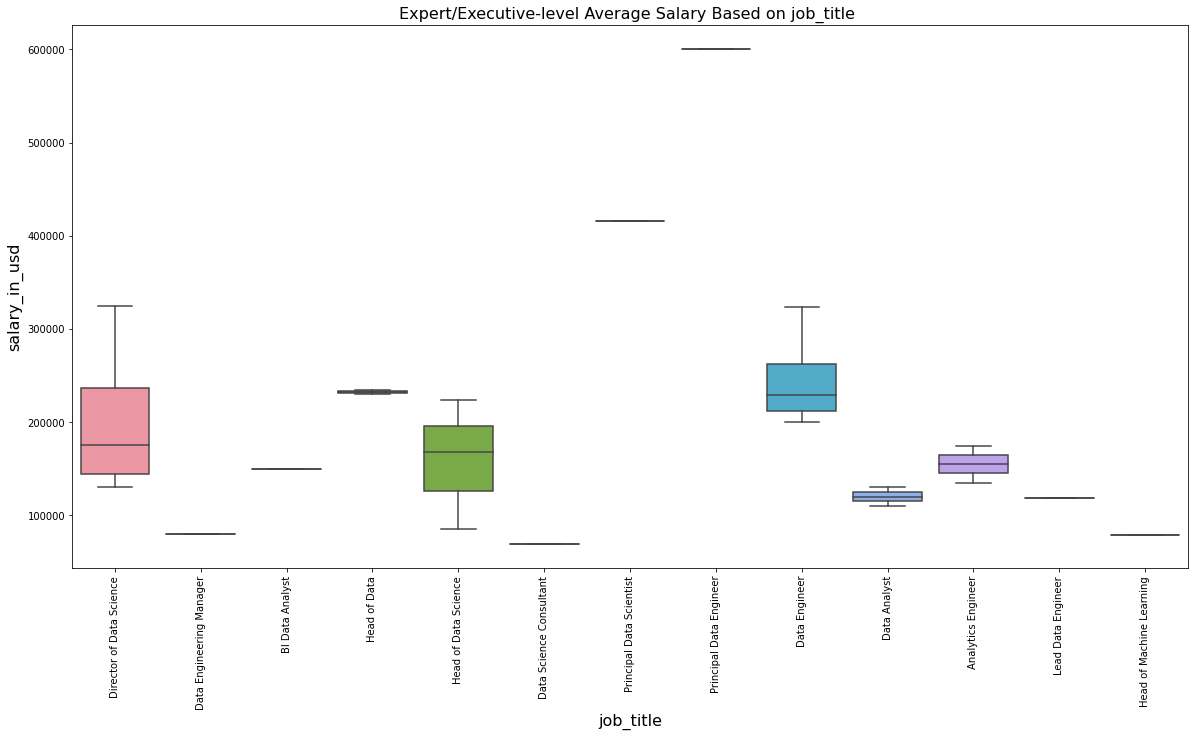

In [271]:
plt.figure(figsize=(20,10))
plt.title("Expert/Executive-level Average Salary Based on job_title ",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df4)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Principal Data Scientist is a high-paying job role for Expert/Executive-level job seekers.

In [206]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [207]:
sl_df['employment_type'].unique()     #PT Part-time FT Full-time CT Contract FL Freelance

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

In [208]:
df5=sl_df.loc[sl_df['employment_type'] =='CT']
df6=sl_df.loc[sl_df['employment_type'] =='FL']
df7=sl_df.loc[sl_df['employment_type'] =='FT']
df8=sl_df.loc[sl_df['employment_type'] =='PT']

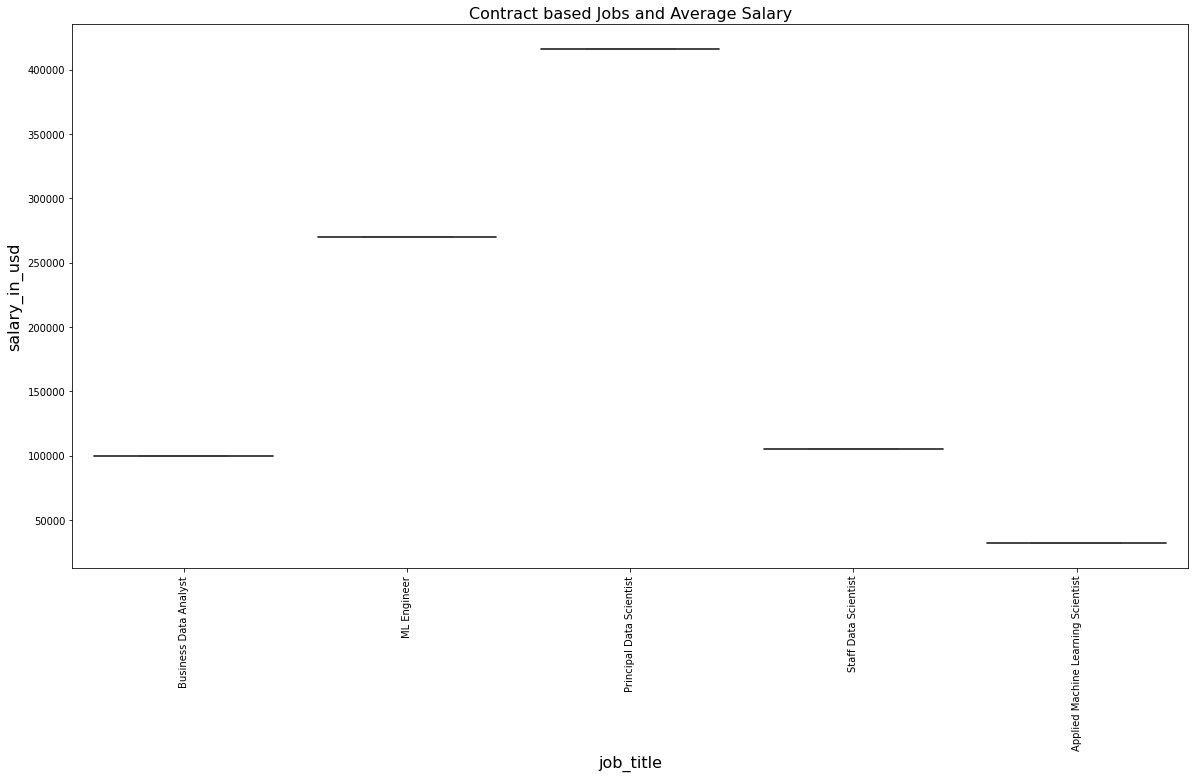

In [272]:
plt.figure(figsize=(20,10))
plt.title("Contract based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df5)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* If you want to work on a contract based then the Principal Data Scientist job role has high pay.

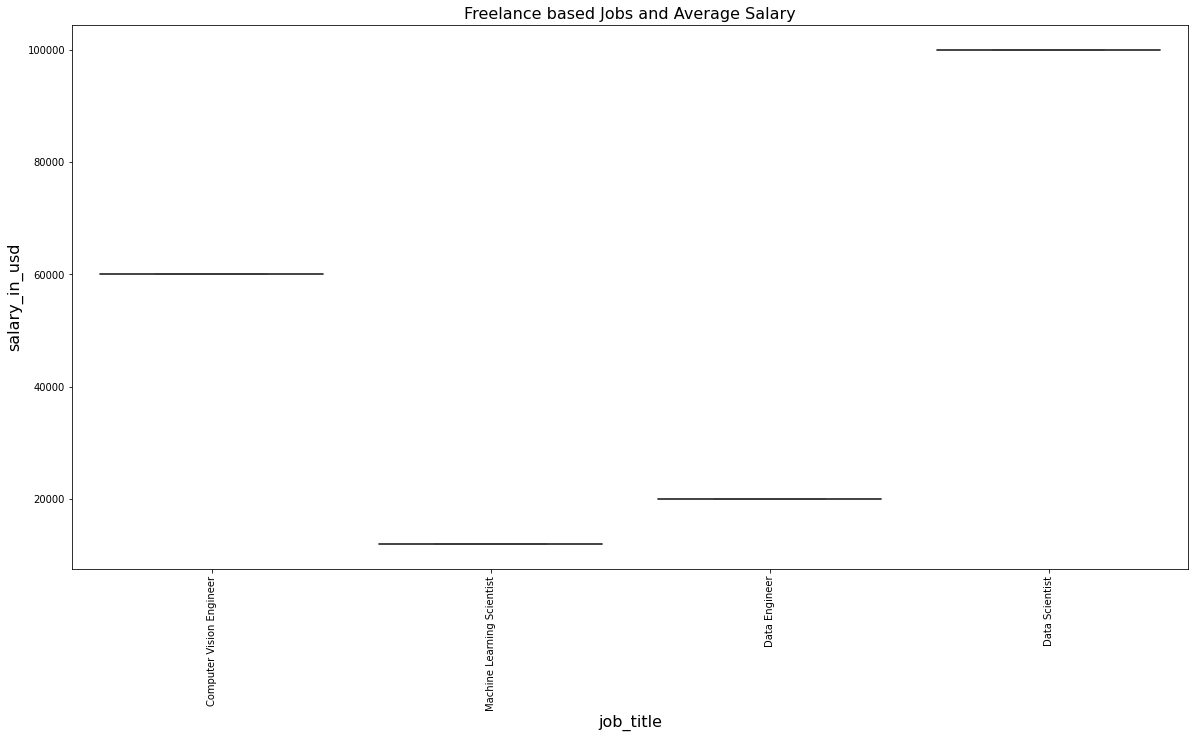

In [273]:
plt.figure(figsize=(20,10))
plt.title("Freelance based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df6)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* If you want to work as a Freelancer then the Data Scientist job role has high pay.

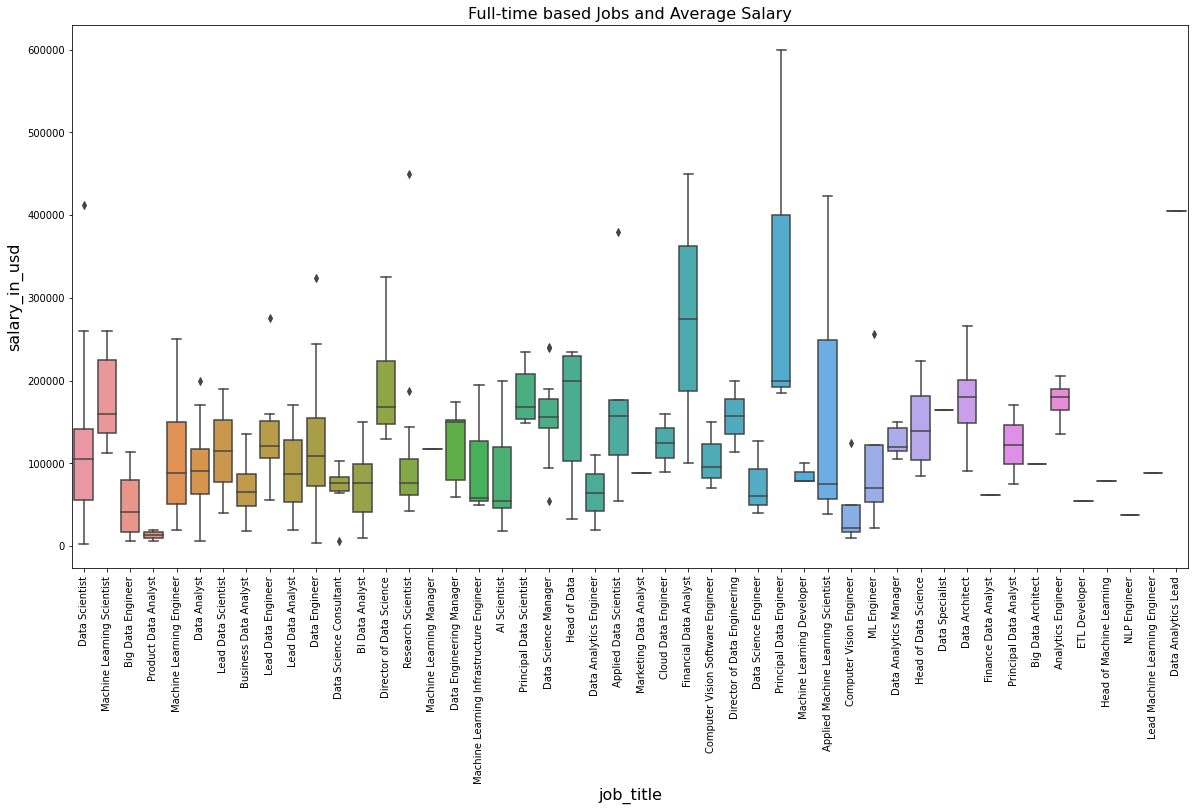

In [274]:
plt.figure(figsize=(20,10))
plt.title("Full-time based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df7)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* If you want to work as a Full time then the Financial Data Analyst job role has high pay.

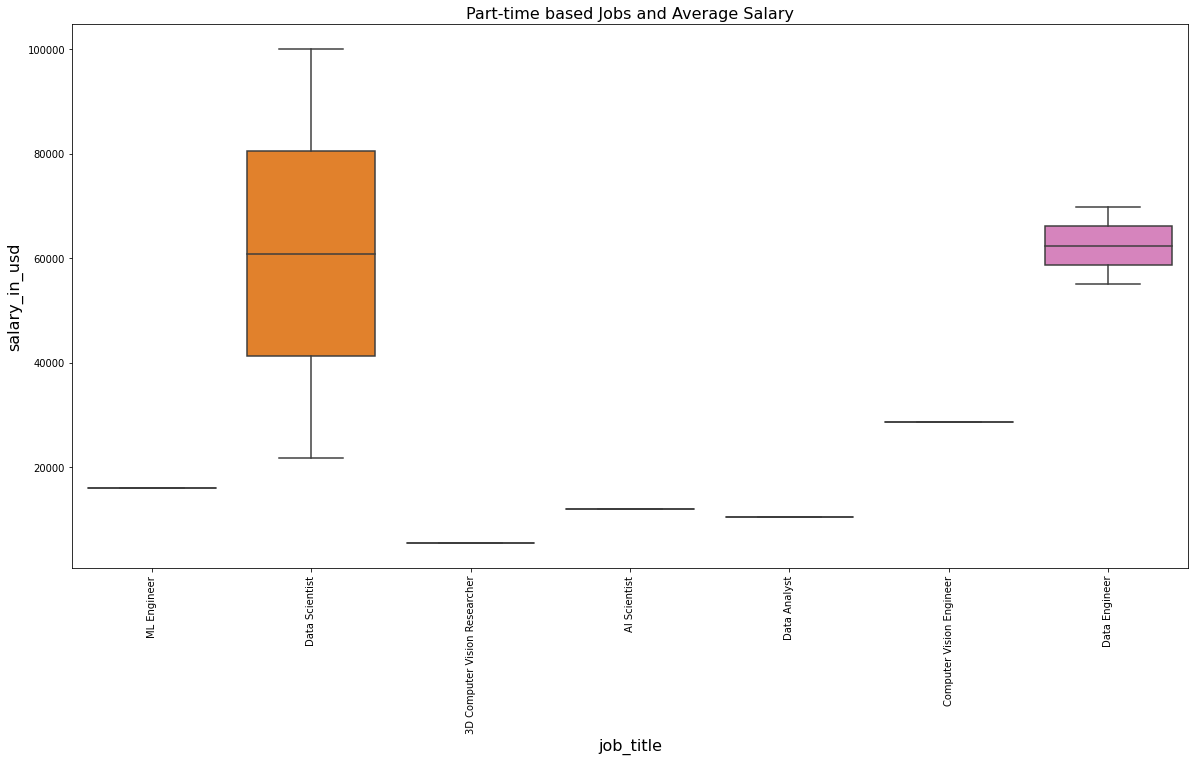

In [275]:
plt.figure(figsize=(20,10))
plt.title("Part-time based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df8)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* If you want to work Part time then the Data Scientist and data Engineering job role has high pay.

In [213]:
sl_df['company_size'].unique()          #small,medium,large

['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']

In [214]:
df9=sl_df.loc[sl_df['company_size'] =='S']
df10=sl_df.loc[sl_df['company_size'] =='M']
df11=sl_df.loc[sl_df['company_size'] =='L']


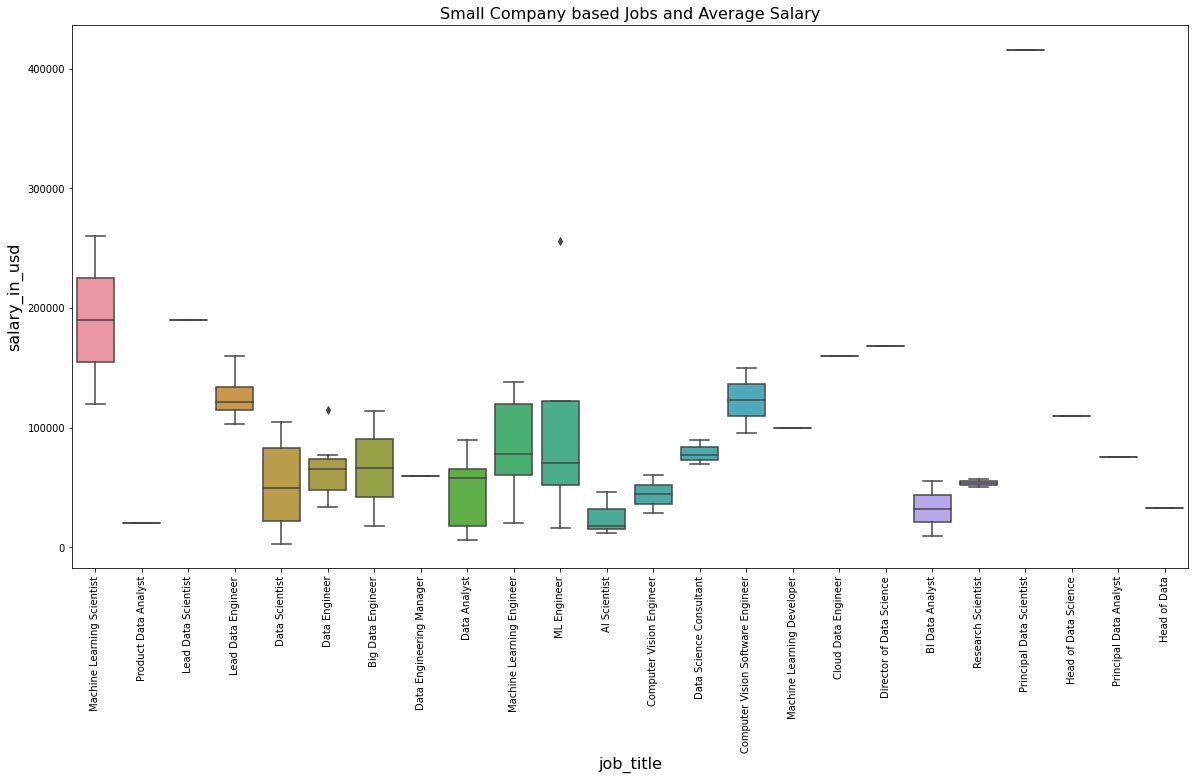

In [276]:
plt.figure(figsize=(20,10))
plt.title("Small Company based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df9)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Machine Learning scientists have high Paying jobs in Small Companies.

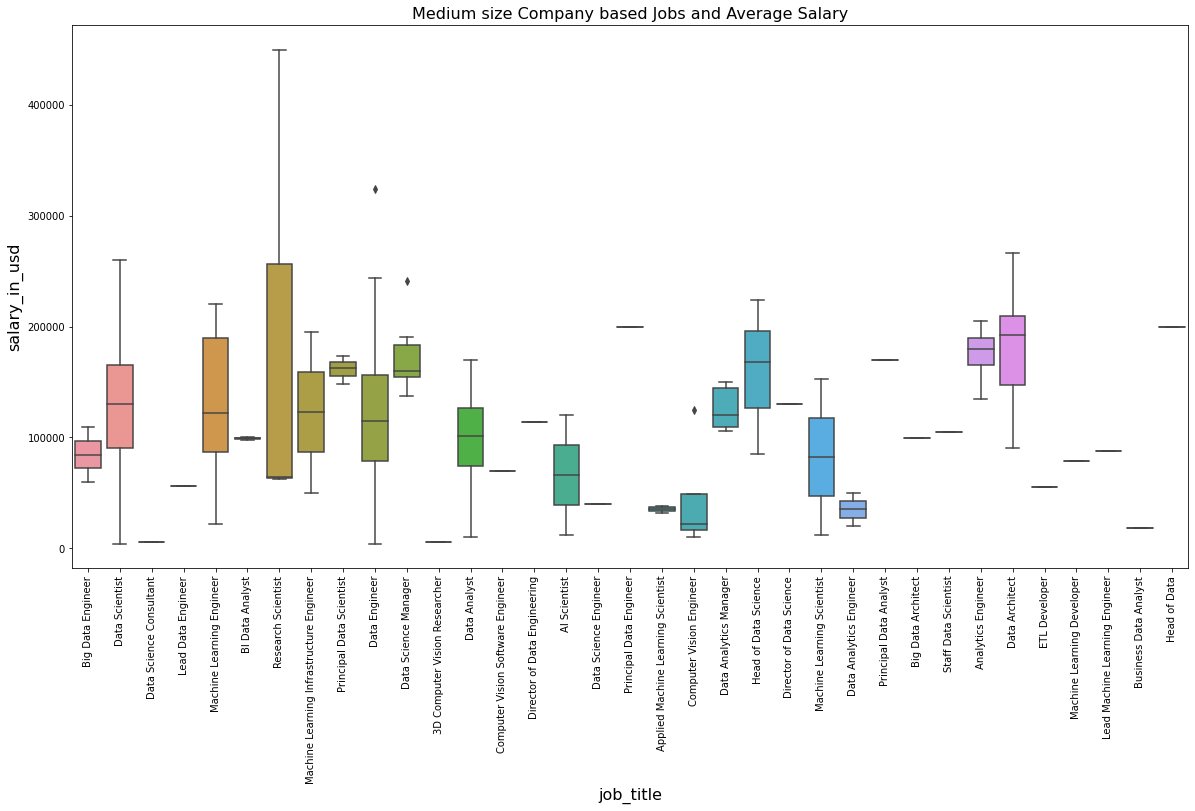

In [277]:
plt.figure(figsize=(20,10))
plt.title("Medium size Company based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df10)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Research scientists have high Paying jobs in medium size Companies.

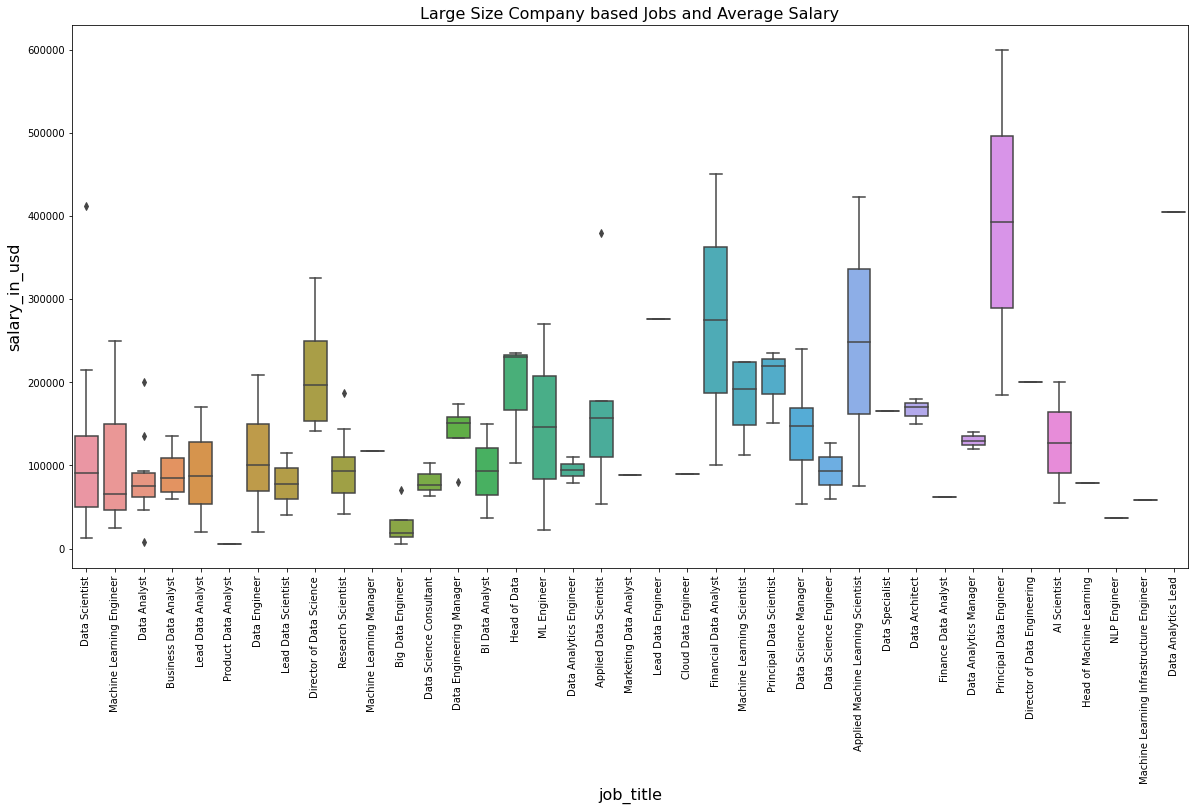

In [278]:
plt.figure(figsize=(20,10))
plt.title("Large Size Company based Jobs and Average Salary",fontsize=16)
sns.boxplot(y="salary_in_usd",x ='job_title',data =df11)
plt.xlabel("job_title",fontsize=16)
plt.ylabel("salary_in_usd",fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Principal data Engineers have high Paying jobs in large-size Companies.

In [218]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


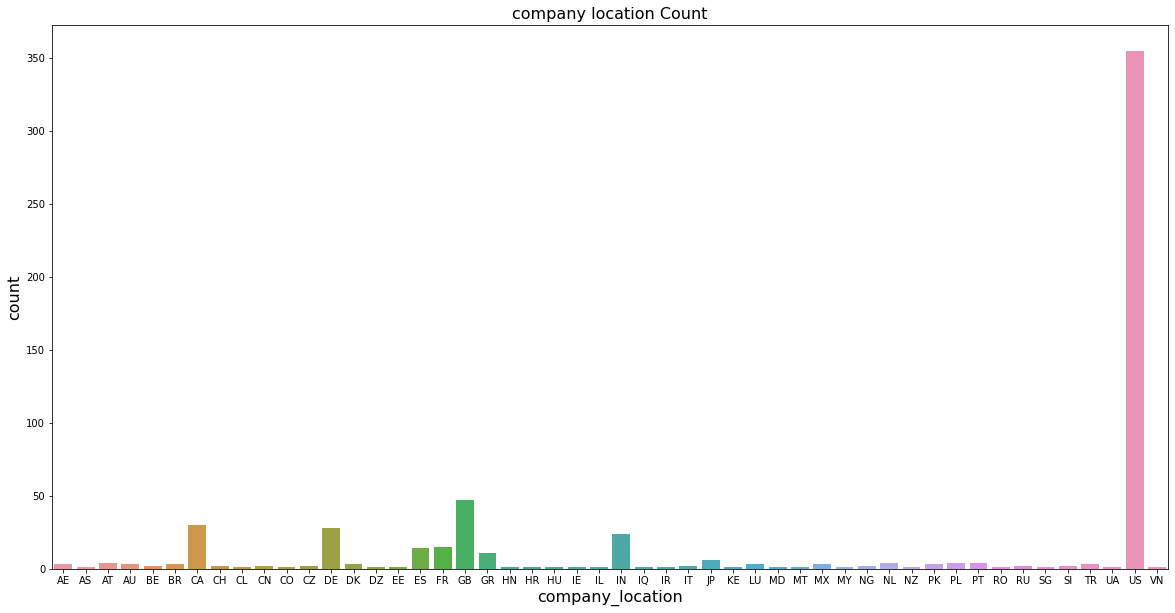

In [281]:
plt.figure(figsize=(20,10))
plt.title("company location Count",fontsize=16)
sns.countplot(data=sl_df,x='company_location')
plt.xlabel("company_location",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

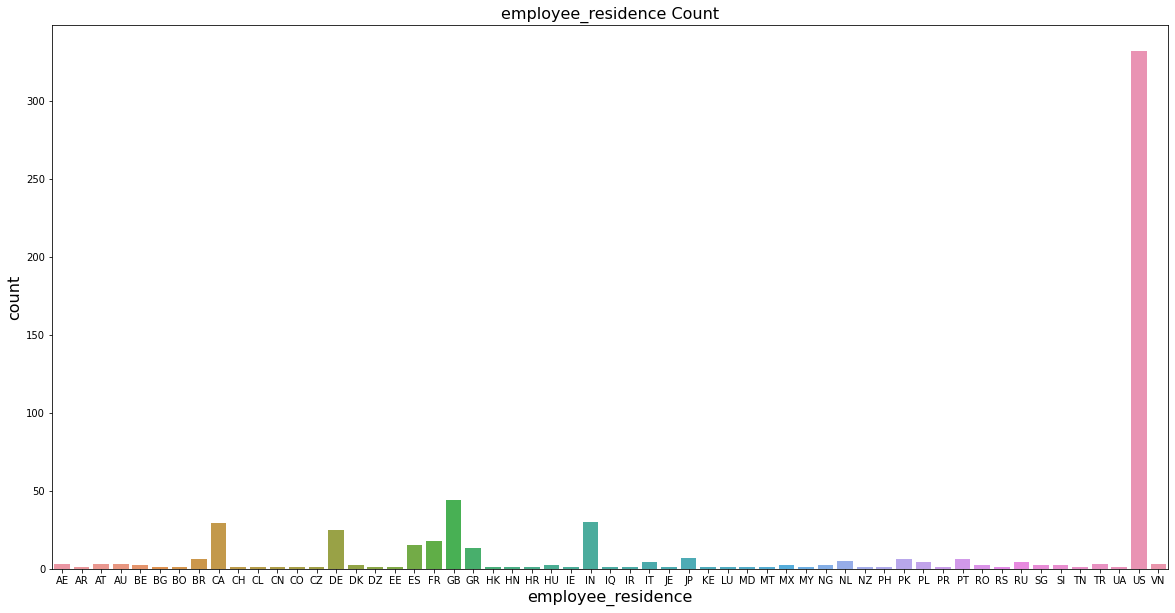

In [282]:
plt.figure(figsize=(20,10))
plt.title("employee_residence Count",fontsize=16)
sns.countplot(data=sl_df,x='employee_residence')
plt.xlabel("employee_residence",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

In [221]:
sl_df1=sl_df.groupby(['salary_currency'])['salary_in_usd'].sum().reset_index()
sl_df1=sl_df1.sort_values(by='salary_in_usd', ascending=False)

In [222]:
sl_df1

,salary_currency,salary_in_usd
16,USD,54631386
7,EUR,6246390
8,GBP,3593523
2,CAD,1750012
10,INR,749670
14,SGD,208353
11,JPY,182764
0,AUD,174128
3,CHF,122346
13,PLN,110663


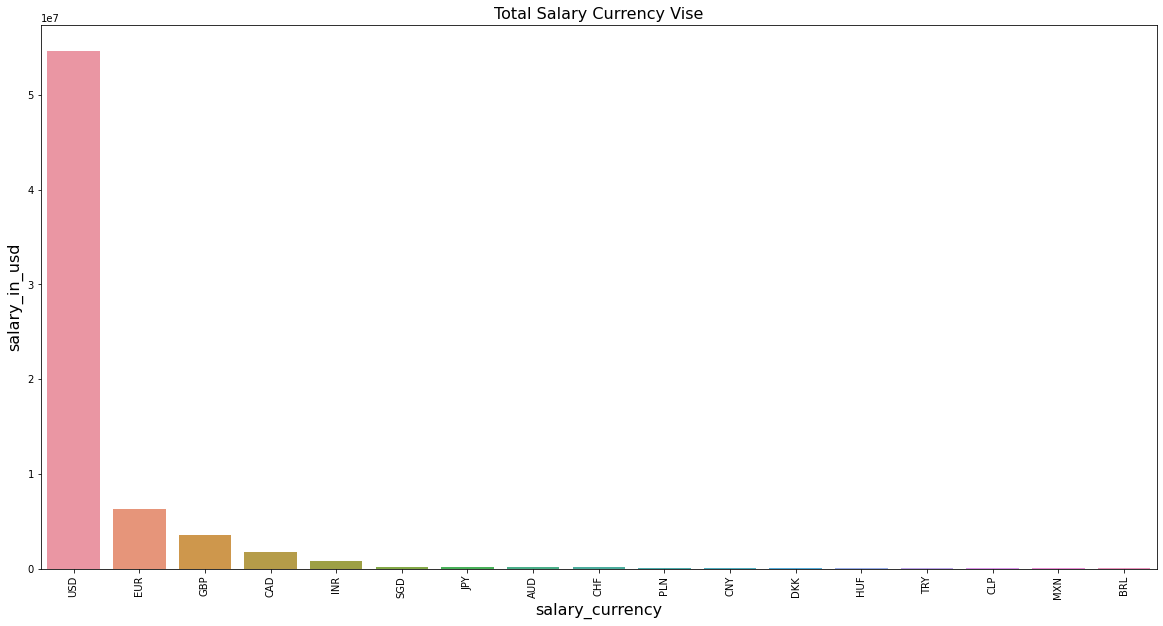

In [283]:
plt.figure(figsize=(20,10))
plt.title("Total Salary Currency Vise",fontsize=16)
sns.barplot(data=sl_df1,x="salary_currency",y="salary_in_usd")
plt.xticks(rotation= 90)
plt.xlabel('salary_currency',fontsize=16)
plt.ylabel('salary_in_usd',fontsize=16)
plt.show()

* By summing the salaries column we end up with a very skewed data towards USA. This might be because of various factors like most data scientist jobs being created in USA, the data being mostly collected in US, or the data collection form might be in english and this from might have been circulated in non-english speaking countries. However, in order to linearize the data, we will take a log10 scale on salaries column and this scaled values are passed for drawing the colors of the map.


In [224]:
sl_df2=sl_df.groupby(['salary_currency'])['salary_in_usd'].mean().reset_index()
sl_df2=sl_df2.sort_values(by='salary_in_usd', ascending=False)

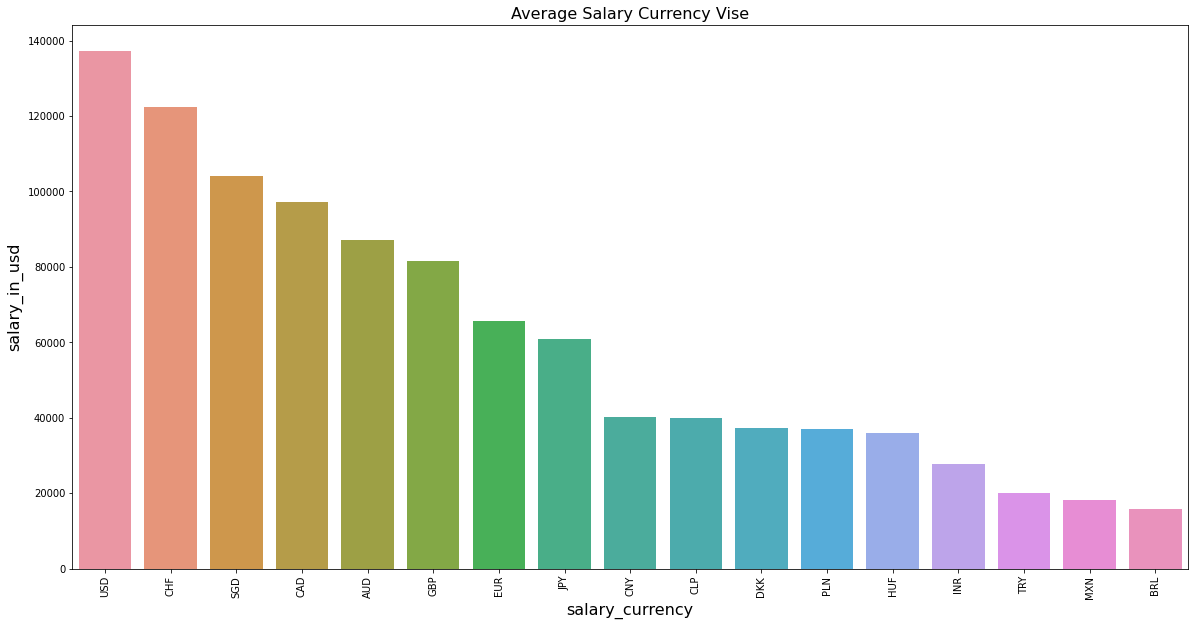

In [284]:
plt.figure(figsize=(20,10))
plt.title("Average Salary Currency Vise",fontsize=16)
sns.barplot(data=sl_df2,x="salary_currency",y="salary_in_usd")
plt.xticks(rotation= 90)
plt.xlabel('salary_currency',fontsize=16)
plt.ylabel('salary_in_usd',fontsize=16)
plt.show()

* The sum of salaries might not be a correct measure for comparison as the entries in a particular country might be more than other. So we plot the mean. This gives a much better idea of salaries across the world.

* Taking average salaries as a function of currency reveals that people earn most in USD, followed by Euro and British Pound. This graph is heavily influenced by the value of a particular currency as most currencies on the left hand side of graph have relatively high value against USD.

* It can be observed that majority of data science jobs are in United States of America (US) and it also has highest paying jobs. Canada (CA), Japan (JP), Germany (DE), United Kingdom (GB), Spain (ES), France (FR), Greece (GR) and India (IN) follows in terms of highest job salaries and number of jobs (except Japan) in that order respectively.

## **Inferences and Conclusion**

**A detailed data analysis is done for the given dataset of Data Science Job Salaries. It can be concluded that:**

* Data Science is one the most popular and emerging field in almost all industries such as Healthcare, Sports, Art, etc.

* The variation of average salary of data scientists across the world are explored.

* The variation of salaries across type of employment such as Contract basis, Full-time, etc is very crucial.

* The variation of salaries as you gain experience is a rising curve.

* Owing to the Covid - 19 crisis, the work environment was shifted to Work from Home and back to normalcy as the time passed.

**Thank you**

          -NAVJOT KHATRI